In [20]:
# coding: utf-8
import sys
sys.path.insert(0,"/home/xlwang/NetworkCompress/src")
import os
# os.environ["KERAS_BACKEND"]="tensorflow"
from net2net import *
input_shape=(64,16,16)
%matplotlib inline

In [21]:
def make_model_for_conv_fc(width,with_activation=False,with_max_pool=False,with_dropout=False):
    input_node=Input(shape=(input_shape),name="input")
    x = Convolution2D(64, 3, 3, name='conv7'
                      ,activation='relu' if  with_activation else None
                      )(input_node)
    x=Convolution2D(width,3,3,name='conv8'
                    ,activation='relu'if  with_activation else None
                    )(x)
    x=MaxPooling2D(name="pool1")(x)  if with_max_pool else x
    x=Dropout(0.25,name="drop1")(x) if with_dropout else x
    x=Flatten(name="flatten")(x)
    output_node=Dense(64,name='fc1'
            ,activation='relu'if  with_activation else None
            )(x)
    model=Model(input=input_node,output=output_node)
    model.trainable=False
    return model

def make_model_for_conv_conv(width,with_activation=False,with_max_pool=False,with_dropout=False):
    input_node=Input(shape=(input_shape),name="input")
    x = Convolution2D(width, 3, 3, name='conv7'
                      , activation='relu' if with_activation else None
                      )(input_node)
    x=Convolution2D(256,3,3,name='conv8'
                    , activation='relu' if with_activation else None
                    )(x)
    x = MaxPooling2D(name="pool1")(x) if with_max_pool else x
    x = Dropout(0.25,name="drop1")(x) if with_dropout else x
    x=Flatten(name="flatten")(x)
    output_node=Dense(64,name='fc1'
                      , activation='relu' if with_activation else None
            )(x)
    model=Model(input=input_node,output=output_node)
    model.trainable=False
    return model


[ 0.97469419 -0.36888629  0.15662831 -0.05284353  0.45348334]


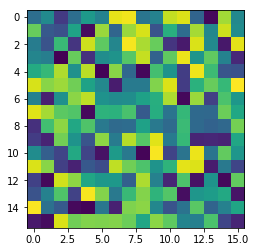

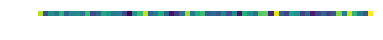

In [22]:
np.random.seed(1)
model=make_model_for_conv_conv(64)
input_inst=np.random.random((1,)+input_shape)
output_inst=K.function(inputs=[model.input, K.learning_phase()], outputs=[model.output])([input_inst,0])
# plt.switch_backend("TkAgg")
# get_ipython().magic(u'matplotlib inline')
print output_inst[0].ravel()[:5]
plt.figure()
plt.imshow(input_inst[0][0])
plt.figure()
plt.imshow(output_inst[0])
_=plt.axis("off")

In [23]:
model2=make_model_for_conv_conv(256)
print [l.name for l in model.layers]
print [l.name for l in model2.layers]

['input', 'conv7', 'conv8', 'flatten', 'fc1']
['input', 'conv7', 'conv8', 'flatten', 'fc1']


In [24]:
copy_weights(student_model=model2,teacher_model=model)
w_conv1, b_conv1 = model.get_layer("conv7").get_weights()
w_conv2, b_conv2 = model.get_layer("conv8").get_weights()
new_w_conv1, new_b_conv1, new_w_conv2 = wider_conv2d_weight(
    w_conv1, b_conv1, w_conv2, 256, "net2wider")
model2.get_layer("conv7").set_weights([new_w_conv1, new_b_conv1])
model2.get_layer("conv8").set_weights([new_w_conv2, b_conv2])


[ 0.94842249 -0.36223754  0.17102721 -0.04181549  0.44683617]
3.55702 3.55702


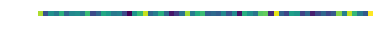

In [25]:
output_inst2=K.function(inputs=[model2.input, K.learning_phase()], outputs=[model2.output])([input_inst,0])
# plt.switch_backend("TkAgg")
# get_ipython().magic(u'matplotlib inline')
print output_inst2[0].ravel()[:5]
plt.figure()
plt.imshow(output_inst2[0])
_=plt.axis("off")

print output_inst[0].sum(),output_inst[0].sum()

[ 0.11219031 -0.18956055  0.49331215  0.06121677  2.24271488]
['input', 'conv7', 'conv8', 'flatten', 'fc1']
['input', 'conv7', 'conv8', 'flatten', 'fc1']


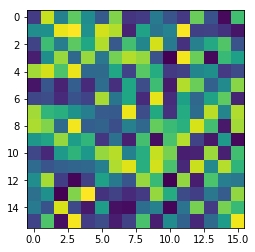

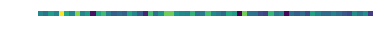

In [26]:
np.random.seed(1)
model=make_model_for_conv_fc(64)
input_inst=np.random.random((1,)+input_shape)
output_inst=K.function(inputs=[model.input, K.learning_phase()], outputs=[model.output])([input_inst,0])
# plt.switch_backend("TkAgg")
# get_ipython().magic(u'matplotlib inline')
print output_inst[0].ravel()[:5]
plt.figure()
plt.imshow(input_inst[0][0])
plt.figure()
plt.imshow(output_inst[0])
_=plt.axis("off")

model2=make_model_for_conv_fc(256)
print [l.name for l in model.layers]
print [l.name for l in model2.layers]

[ 0.11219031 -0.18956055  0.49331215  0.06121677  2.24271488] 
[-0.22995114 -0.12165456  0.74376762  0.39020807  0.10958564]
2.72978 2.72978


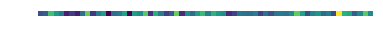

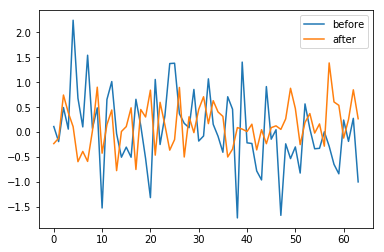

In [27]:
output_inst2=K.function(inputs=[model2.input, K.learning_phase()], outputs=[model2.output])([input_inst,0])
# plt.switch_backend("TkAgg")
# get_ipython().magic(u'matplotlib inline')
print output_inst[0].ravel()[:5],"\n",output_inst2[0].ravel()[:5]
plt.figure()
plt.imshow(output_inst2[0])
_=plt.axis("off")

print output_inst[0].sum(),output_inst[0].sum()
plt.figure()
plt.plot(output_inst[0][0])
plt.plot(output_inst2[0][0])
plt.legend(["before","after"])